## Heart Disease UCI
<a href = "https://archive.ics.uci.edu/ml/datasets/Heart+Disease">UCI Machine Learning repository</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Loading the data set

Lets just load the data set and just check the data

In [2]:
raw_dataset = pd.read_csv('Heart Disease UCI.csv')

In [3]:
raw_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Now let's understand what each column mean
<br>
<li>Age - Age of the patient in years</li>
<li>sex - Gender of the patient 1 = male, 0 = female</li>
<li>cp - chest pain type (4 values)</li>
<li>trestbps - Resting blood pressure</li>
<li>Chol - Serum cholestoral in mg/dl</li>
<li>fbs - fasting blood sugar > 120 mg/dl </li>
<li>restecg - resting electrocardiographic results (values 0,1,2) </li>
<li>thalach - maximum heart rate achieved</li>
<li>exang - exercise induced angina</li>
<li>oldpeak - ST depression induced by exercise relative to rest</li>
<li>slope - the slope of the peak exercise ST segment</li>
<li>ca - number of major vessels (0-3) colored by flourosopy</li>
<li>thal - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
<li>target - 1 = heart attack risk 0 = no heart attack</li>

## Data exploration

In [4]:
raw_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# checking for correlation
raw_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


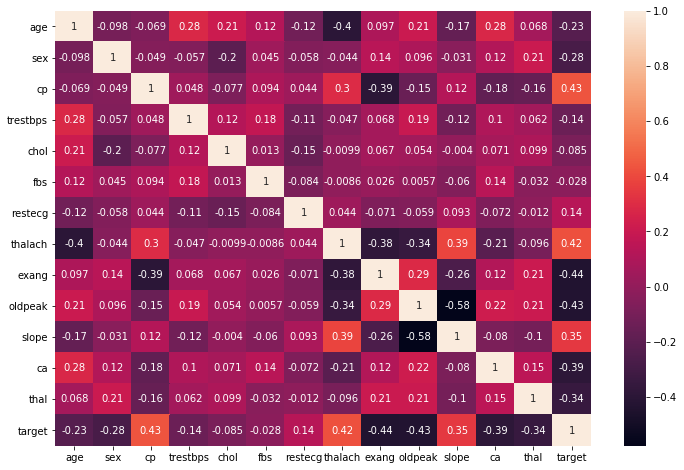

In [6]:
plt.figure(figsize=(12,8))

sns.heatmap(data = raw_dataset.corr(), annot=True)

## Inference 
<br>
There doesn't seem to be any positve correlation between any of the variables. 
Lets visualize the data even further to see any interesting relations

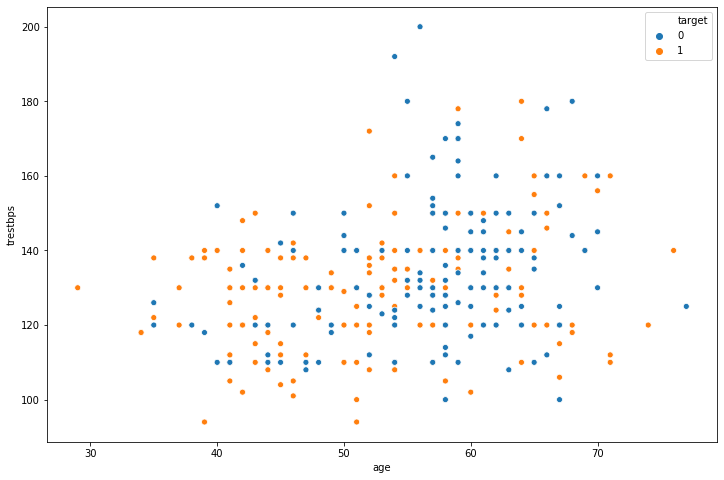

In [7]:
plt.figure(figsize=(12,8))

#scatter plot with age and sex with target as hue

sns.scatterplot(x = raw_dataset['age'], y = raw_dataset['trestbps'], hue = raw_dataset['target'])

It looks like heart attack risk is fairly common in the people of age range 40-60 and more so if your resting blood pressure is more than 120. Lets have a closer look at these two variables

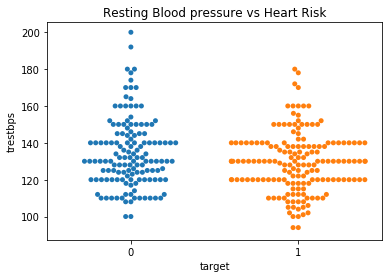

In [8]:
plt.figure(figsize=(6,4))
plt.title("Resting Blood pressure vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['trestbps'])

On a second look the data seems to be similar for both the target. Resting blood pressure(RBP) doesn't seem to be a contributing factor according to the data. Even though a lot of the patients who are at risk of an heart attack seem to have an RBP between 120-140

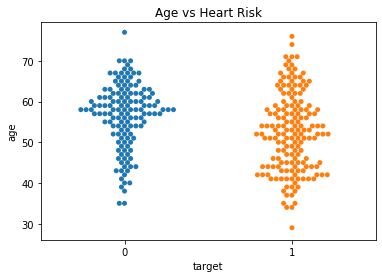

In [9]:
#Checking the heart risk with age
plt.figure(figsize=(6,4))
plt.title("Age vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['age'])

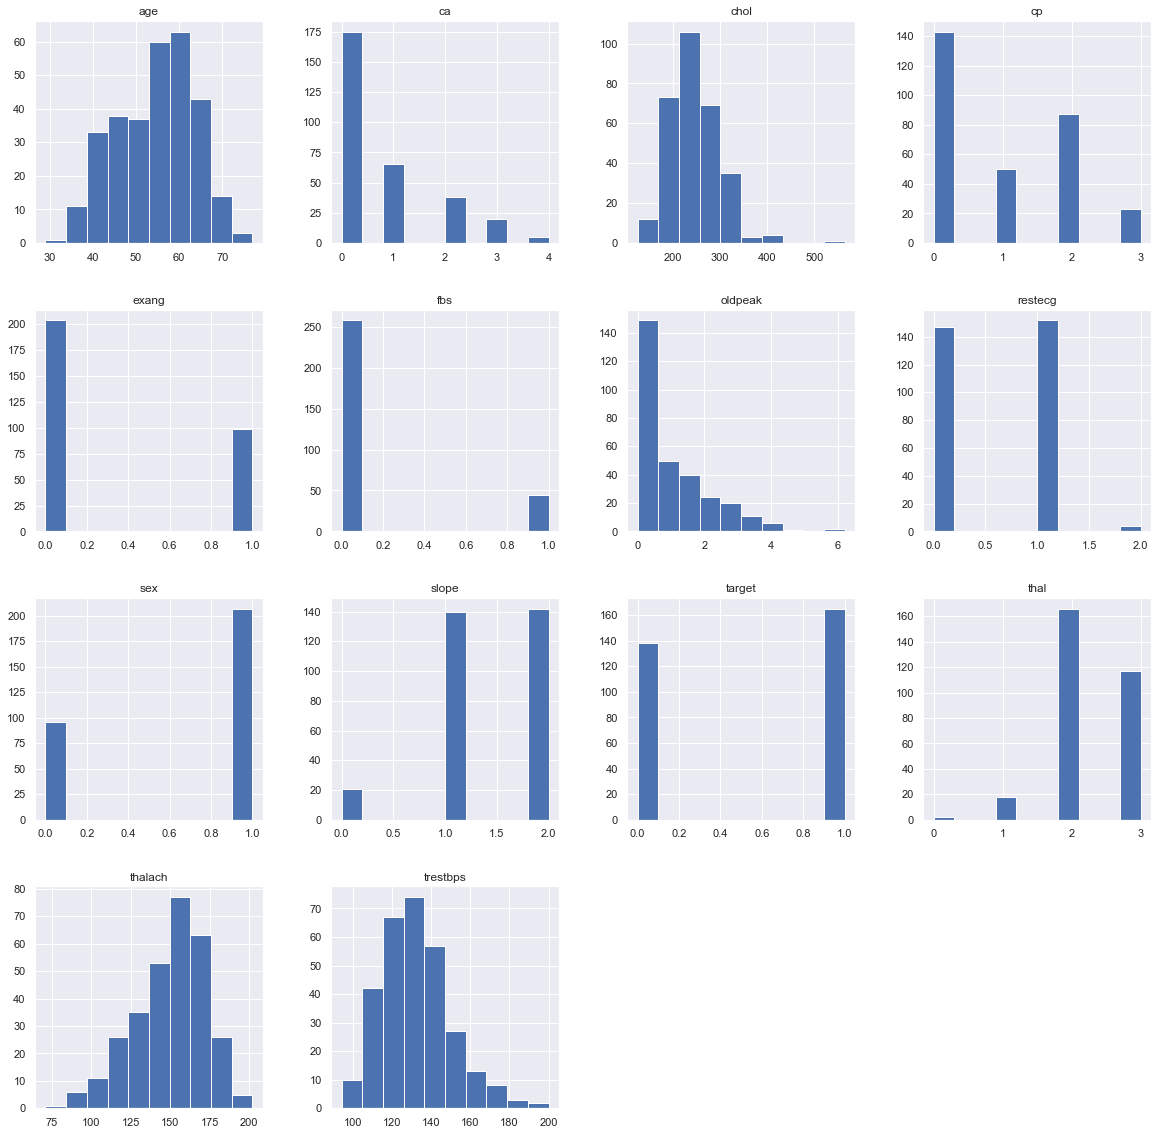

In [16]:
sns.set()
p = raw_dataset.hist(figsize=(20,20))

The most interesting of the graphs here are chol, cp, ca and old peak. Lets see some swarm plots to see if they tell us anything more

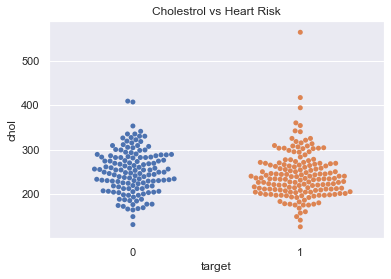

In [23]:
plt.figure(figsize=(6,4))
plt.title("Cholestrol vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['chol'])

Most people in cholestrol range 200-300 seem to have gotten heart attacks

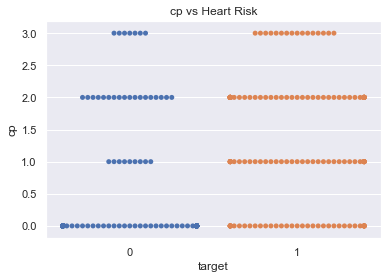

In [24]:
plt.figure(figsize=(6,4))
plt.title("cp vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['cp'])

People with Chest pain type 1 have a higher risk of getting an heart attack

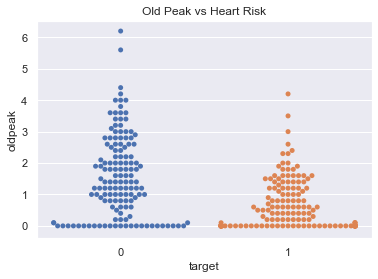

In [26]:
plt.figure(figsize=(6,4))
plt.title("Old Peak vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['oldpeak'])

Maximum number of people who had a heart attack have an old peak less than 2

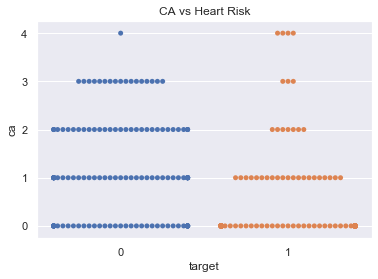

In [27]:
plt.figure(figsize=(6,4))
plt.title("CA vs Heart Risk")
sns.swarmplot(x = raw_dataset['target'],
              y = raw_dataset['ca'])

Majority of the heart attacks occured on people with a CA of 0 or 1

## Data preprocessing

In [32]:
shuffled_data_set = raw_dataset.sample(frac=1)

In [33]:
print(shuffled_data_set)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
52    62    1   2       130   231    0        1      146      0      1.8   
31    65    1   0       120   177    0        1      140      0      0.4   
225   70    1   0       145   174    0        1      125      1      2.6   
296   63    0   0       124   197    0        1      136      1      0.0   
141   43    1   0       115   303    0        1      181      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
84    42    0   0       102   265    0        0      122      0      0.6   
43    53    0   0       130   264    0        0      143      0      0.4   
239   35    1   0       126   282    0        0      156      1      0.0   
236   58    1   0       125   300    0        0      171      0      0.0   
264   54    1   0       110   206    0        0      108      1      0.0   

     slope  ca  thal  target  
52       1   3     3       1  
31       2   0     3     

Creating numpy arrays of the shuffled dataset

In [34]:
X = shuffled_data_set.iloc[:,:-1].values
y = shuffled_data_set.iloc[:,-1].values

In [35]:
print(X)

[[62.  1.  2. ...  1.  3.  3.]
 [65.  1.  0. ...  2.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [35.  1.  0. ...  2.  0.  3.]
 [58.  1.  0. ...  2.  2.  3.]
 [54.  1.  0. ...  1.  1.  2.]]


In [36]:
print(y)

[1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0]


## Encoding categorical Data

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2,11])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[0.  0.  1.  ... 1.8 1.  3. ]
 [1.  0.  0.  ... 0.4 2.  3. ]
 [1.  0.  0.  ... 2.6 0.  3. ]
 ...
 [1.  0.  0.  ... 0.  2.  3. ]
 [1.  0.  0.  ... 0.  2.  3. ]
 [1.  0.  0.  ... 0.  1.  2. ]]


## Spliting the data into train and test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
print(y_test)

[0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


## Making a simple logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\rpujari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the results

In [42]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

Accuracy on train and test set

In [43]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,y_pred_train)
acc_test = accuracy_score(y_test,y_pred_test)

In [45]:
print("The accuracy on the training set is: " + str(acc_train))
print("The accuracy on the test set is: " + str(acc_test))

The accuracy on the training set is: 0.8636363636363636
The accuracy on the test set is: 0.9344262295081968


The training set accuracy is lower than the test scale accuracy. One the reasons for this might be that the data(num_examples) is only 150. If we had a large amount of data we could have trained our model better. Let's try to do it anyway.

Let's check for any missing values and the scale the data

In [49]:
shuffled_data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing data

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(shuffled_data_set.drop(['target'], axis = 1))

In [50]:
y = shuffled_data_set.iloc[:,-1].values

## Splitting the data again

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 1)

## Dimensionality reduction
We will be applying LDA(linear discriminant analysis) as our data is labeled

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\rpujari\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\rpujari\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


## Training the model

In [60]:
# lets use SVM
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Prediction

In [61]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,y_pred_train)
acc_test = accuracy_score(y_test,y_pred_test)

print("The accuracy on the training set is: " + str(acc_train))
print("The accuracy on the test set is: " + str(acc_test))

The accuracy on the training set is: 0.8482490272373541
The accuracy on the test set is: 0.9565217391304348


## Model Selection

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25,0.5,0.75,1], 'kernel': ['linear']},
                { 'C':[0.25,0.5,0.75,1], 'kernel': ['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [64]:
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_

In [65]:
print("The best accuracy is : " + str(best_accuracy))
print("The best parameters are: " + str(best_parameter))

The best accuracy is : 0.8484615384615385
The best parameters are: {'C': 0.25, 'gamma': 0.8, 'kernel': 'rbf'}


Not much of a difference